In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , roc_auc_score 
from sklearn import metrics

In [4]:
white = pd.read_csv('datasets/winequality-white.csv' , delimiter = ';')
red = pd.read_csv('datasets/winequality-red.csv' , delimiter = ';')

In [5]:
white.drop(['quality'] , axis = 1 , inplace=True)
red.drop(['quality'] , axis = 1 , inplace=True)

In [6]:
white['label'] = 1
red['label'] = 0

In [7]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [8]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [9]:
wine = pd.concat([white , red]).reset_index()
del wine['index']

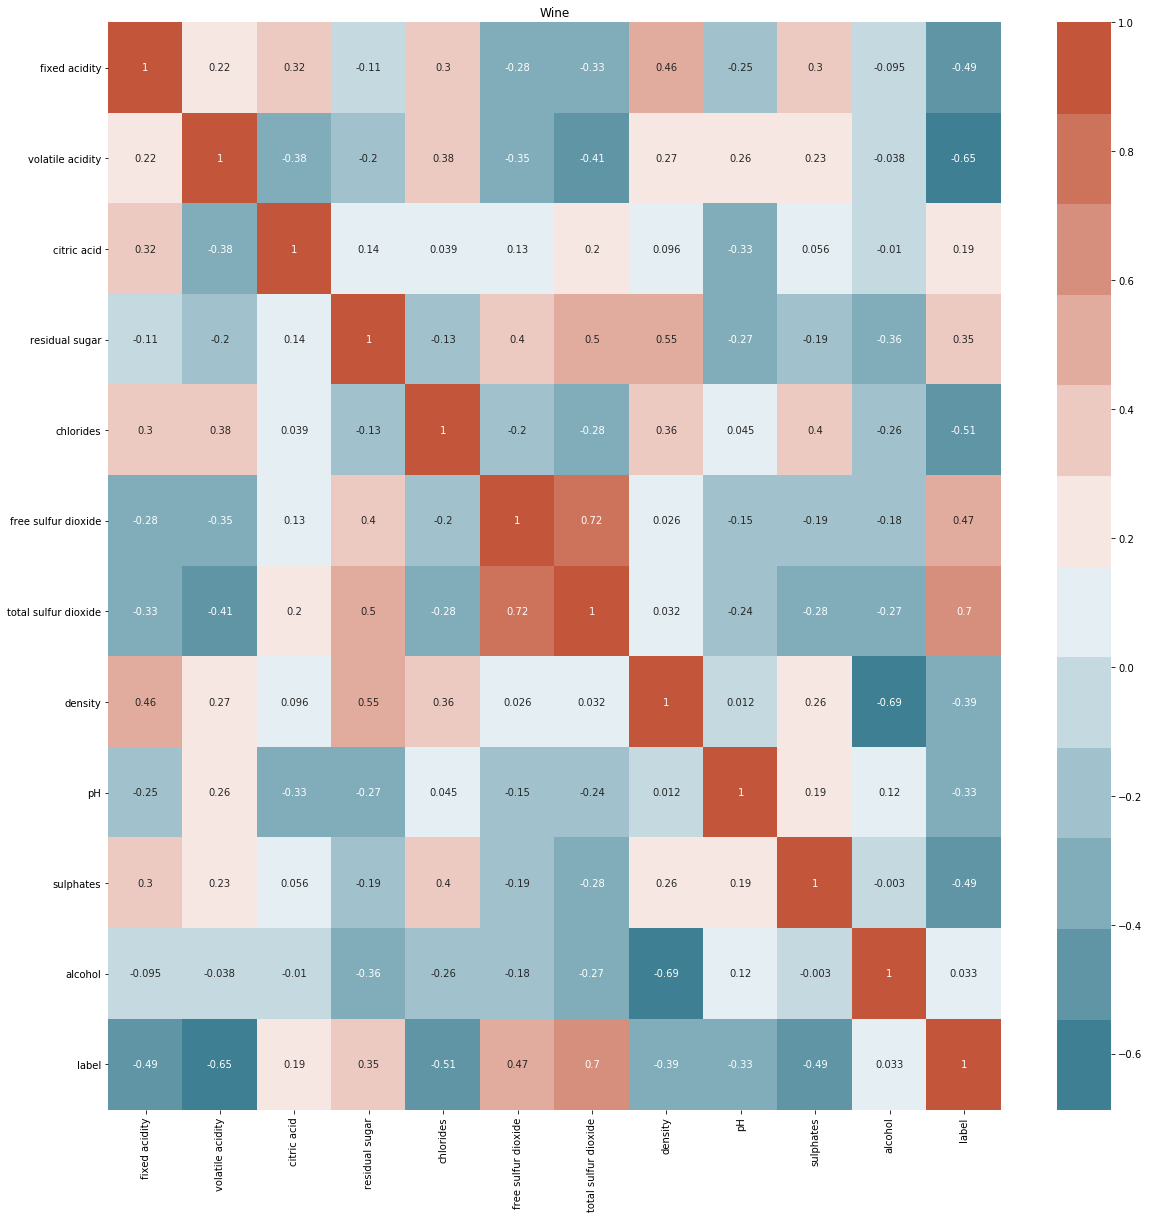

In [11]:
plt.figure(figsize=(20, 20))
df_corr = wine.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Wine")
plt.show()

In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
label                   6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [19]:
X = wine.drop(['label' , 'density' , 'citric acid' , 'chlorides' , 'pH' , 'sulphates' , 'alcohol'], axis = 1 ).values
y = wine['label'].values

In [20]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X , y  , test_size = 0.3 , random_state = 42)

In [50]:
def LogisticRegression_algorithm(X_train, X_test, y_train, y_test):
    
    global y_pred_LG
    global LG_pipeline
    global y_prob_LG
    
    steps = [('scaler', StandardScaler()),
             ('LogisticRegression', LogisticRegression(random_state = 0))]
    
    LG_pipeline = Pipeline(steps)

    
    LG_pipeline.fit(X_train , y_train)
    
    y_pred_LG = LG_pipeline.predict(X_test)
    
    y_prob_LG = LG_pipeline.predict_proba(X_test)
    
    print("Accuracy: {0:.2f} %".format(LG_pipeline.score(X_test, y_test) * 100))
    print(classification_report(y_test, y_pred_LG))

In [34]:
def calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test):
    
    neighbors = np.arange(1, 10)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors= k)
        knn.fit(X_train , y_train)
        train_accuracy[i] = knn.score(X_train, y_train)    
        test_accuracy[i] = knn.score(X_test, y_test)

    plt.figure(figsize=(10, 8))   
    plt.title('k in kNN analysis')
    plt.plot( neighbors , test_accuracy , label = 'Testing Accuracy')
    plt.plot(neighbors,train_accuracy ,label = 'Training Accuracy')
    plt.legend()
    plt.annotate('Best accuracy for this model with this k is {0:.2f} %'.format(max(test_accuracy) * 100), xy=(np.argmax(test_accuracy) + 1 , max(test_accuracy)), xytext=(4 , 0.973),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()

In [25]:
def kNN_algorithm(X_train , y_train , X_test , y_test , k):
    
    global y_pred_kNN
    global kNN_pipeline
    
    steps = [('impute' , SimpleImputer(missing_values = 0, strategy='mean')),
             ('sclaer', StandardScaler()),
             ('kNN', KNeighborsClassifier(n_neighbors = k))]
    
    kNN_pipeline = Pipeline(steps)
    
    kNN_pipeline.fit(X_train , y_train)
    
    y_pred_kNN = kNN_pipeline.predict(X_test)
    
    print(classification_report(y_test , y_pred_kNN))
    print('kNN algorithm acuracy is : {0:.2f} %'.format(kNN_pipeline.score(X_test , y_test) * 100))

In [26]:
def SVM_algorithm(X_train, X_test, y_train, y_test):
    
    global y_pred_SVM
    global SVM_pipeline
    global y_prob_SVM
    
    steps = [('scaler', StandardScaler()),
             ('SVM', SVC(probability=True))]
    
    SVM_pipeline = Pipeline(steps)
    
    parameters = {'SVM__C':[1, 10, 100 ],
                  'SVM__gamma':[0.1, 0.01]}
    
    cv = GridSearchCV(SVM_pipeline , cv = 5 , param_grid = parameters)
    
    cv.fit(X_train , y_train)
    
    y_pred_SVM = cv.predict(X_test)
    
    y_prob_SVM = cv.predict_proba(X_test)
    
    print("Accuracy: {0:.2f} %".format(cv.score(X_test, y_test) * 100))
    print(classification_report(y_test, y_pred_SVM))
    print("Tuned Model Parameters: {}".format(cv.best_params_))

In [27]:
def plot_confusion_matrix(cf_matrix , y_test , model_type , cf_size):
    if cf_size == '2x2':
        group_names = ['True Negative','False Positive','False Negative','True Positive']
        group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
        labels = ['{}\n{}'.format(v1 ,v2) for v1, v2 in zip(group_names,group_counts)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cf_matrix,
            annot = labels,
            cmap=sns.cubehelix_palette(100, as_cmap=True, hue=1, dark=0.30),
            fmt='',
            linewidths=1.5,
            vmin=0,
            vmax=len(y_test),
        )
        plt.title(model_type)
        plt.show()
    else:
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cf_matrix / np.sum(cf_matrix) * 100,
            annot = True,
            cmap=sns.cubehelix_palette(100, as_cmap=True, hue=1, dark=0.30),
            fmt='.2f',
            linewidths=1.5,
            vmin=0,
            vmax=100,
        )
        plt.title(model_type)
        plt.show()

In [28]:
def plot_AUC_ROC_kNN(X_test , y_test , pipeline):
    
    probs = pipeline.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = {0:.2f}'.format(roc_auc_score(y_test, preds)))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('ROC AUC score is ' + '{0:.2f}'.format(roc_auc_score(y_test, preds)))

In [55]:
def plot_AUC_ROC_SVM_and_LG(X_test , y_test , y_prob_SVM):
    
    probs = y_prob_SVM
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = {0:.2f}'.format(roc_auc_score(y_test, preds)))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('ROC AUC score is ' + '{0:.2f}'.format(roc_auc_score(y_test, preds)))

# kNN ( k-Nearest Neighbors )

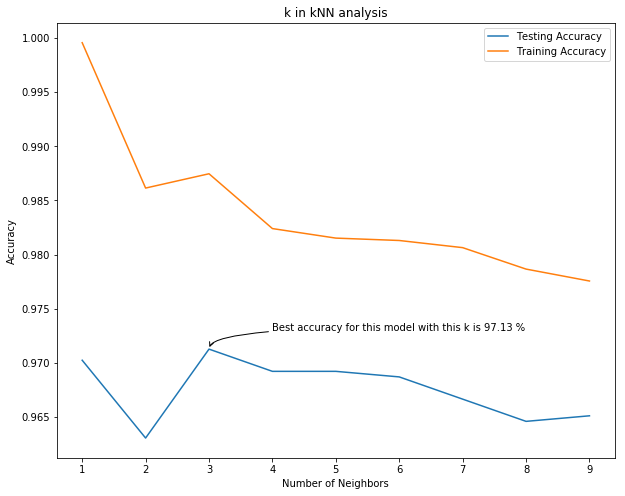

In [35]:
calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test)

In [36]:
kNN_algorithm(X_train , y_train , X_test , y_test , 3)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       477
           1       0.98      0.98      0.98      1473

   micro avg       0.97      0.97      0.97      1950
   macro avg       0.96      0.96      0.96      1950
weighted avg       0.97      0.97      0.97      1950

kNN algorithm acuracy is : 97.08 %


In [37]:
cf_matrix_knn = confusion_matrix(y_test, y_pred_kNN)

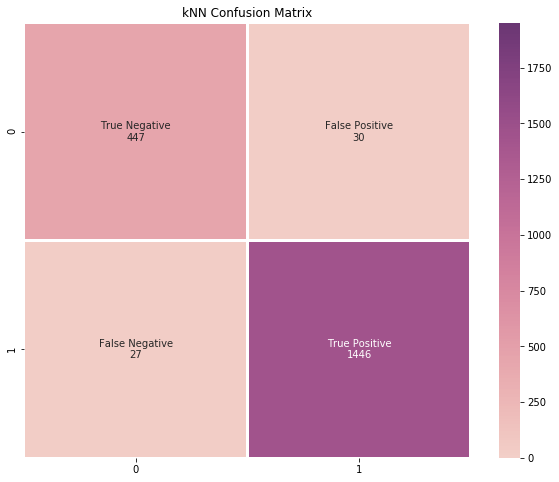

In [39]:
plot_confusion_matrix(cf_matrix_knn , y_test , 'kNN Confusion Matrix' , '2x2')

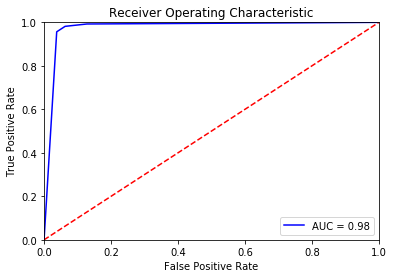

ROC AUC score is 0.98


In [40]:
plot_AUC_ROC_kNN(X_test , y_test , kNN_pipeline)

# SVM (Support vector machine)

In [42]:
SVM_algorithm(X_train, X_test, y_train, y_test)

Accuracy: 96.77 %
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       477
           1       0.97      0.98      0.98      1473

   micro avg       0.97      0.97      0.97      1950
   macro avg       0.96      0.95      0.96      1950
weighted avg       0.97      0.97      0.97      1950

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


In [43]:
cf_matrix_svm = confusion_matrix(y_test, y_pred_SVM)

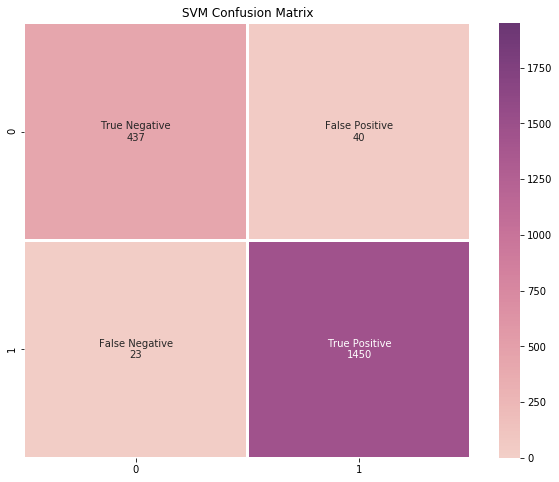

In [45]:
plot_confusion_matrix(cf_matrix_svm , y_test , 'SVM Confusion Matrix' , '2x2')

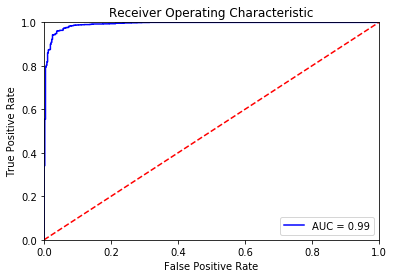

ROC AUC score is 0.99


In [46]:
plot_AUC_ROC_SVM(X_test , y_test , y_prob_SVM)

# Logistic Regression

In [51]:
LogisticRegression_algorithm(X_train, X_test, y_train, y_test)

Accuracy: 96.00 %
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       477
           1       0.97      0.98      0.97      1473

   micro avg       0.96      0.96      0.96      1950
   macro avg       0.95      0.94      0.95      1950
weighted avg       0.96      0.96      0.96      1950



In [52]:
cf_matrix_LG = confusion_matrix(y_test, y_pred_LG)

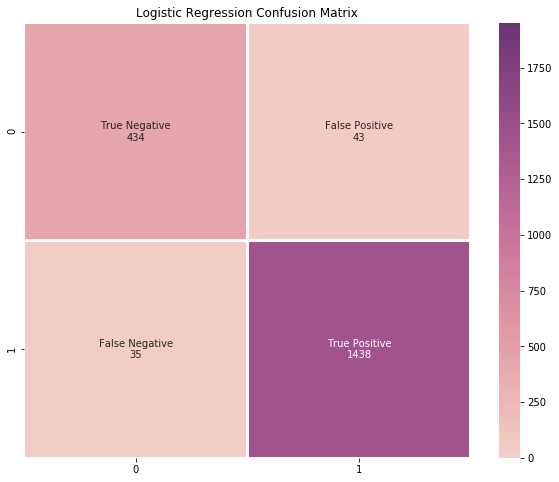

In [53]:
plot_confusion_matrix(cf_matrix_LG , y_test , 'Logistic Regression Confusion Matrix' , '2x2')

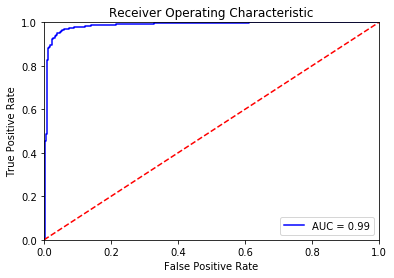

ROC AUC score is 0.99


In [54]:
plot_AUC_ROC_SVM_and_LG(X_test , y_test , y_prob_LG)